Commercial_df_2021

In [1]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series
from sktime.split import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.fbprophet import Prophet
#from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import os
import utils.KEprocessing
import matplotlib.pyplot as plt
import utils.KEprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
commercial_df_2021 = pd.read_csv('data/yearlyData/commercial_df_2021.csv', sep=',', index_col=0)

In [3]:
commercial_df_2021 

,DateTime,CUSTOMER,AREA,ISPRIVATEPERSON,Power_Consumption,One_Day_Power,One_Day_Power_NaN,Air Temperature 1 Min_P19,Air Temperature 2 Max_P27,Air Temperature 2 Min_P26,Dew Point Temperature_P39,Precipitation_P7,Relative Humidity_P6,Wind Speed_P4,Price
6944448,2021-01-01 00:00:00,1060753805,Kvarnholmen,Nej,0.001000,0.023940,0,NaN,NaN,NaN,4.8,NaN,88.0,3.0,24.35
6944449,2021-01-01 00:00:00,1060766019,Malmen,Nej,0.003267,0.089497,0,NaN,NaN,NaN,4.8,NaN,88.0,3.0,24.35
6944451,2021-01-01 00:00:00,1060616621,Malmen,Nej,0.007463,0.196061,0,NaN,NaN,NaN,4.8,NaN,88.0,3.0,24.35
6944452,2021-01-01 00:00:00,1060621516,Malmen,Nej,0.000147,0.003123,0,NaN,NaN,NaN,4.8,NaN,88.0,3.0,24.35
6944453,2021-01-01 00:00:00,1060601163,Kvarnholmen,Nej,0.004140,0.131690,0,NaN,NaN,NaN,4.8,NaN,88.0,3.0,24.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14619619,2021-12-31 23:00:00,1060598838,Kvarnholmen,Nej,0.000558,0.036185,0,NaN,NaN,NaN,5.3,NaN,86.0,5.0,46.60
14619620,2021-12-31 23:00:00,1060598788,Kvarnholmen,Nej,0.000424,0.045261,0,NaN,NaN,NaN,5.3,NaN,86.0,5.0,46.60
14619621,2021-12-31 23:00:00,1060604204,Kvarnholmen,Nej,0.000432,0.010804,0,NaN,NaN,NaN,5.3,NaN,86.0,5.0,46.60
14619622,2021-12-31 23:00:00,1060599041,Kvarnholmen,Nej,0.005087,0.132385,0,NaN,NaN,NaN,5.3,NaN,86.0,5.0,46.60


In [4]:
commercial_df_2021['DateTime'] = pd.to_datetime(commercial_df_2021['DateTime'])
commercial_df_2021.set_index('DateTime', inplace=True)

In [5]:
commercial_df_2021_subset = commercial_df_2021[['Power_Consumption', 'Price', 'Dew Point Temperature_P39']]

In [6]:
commercial_df_2021_subset

,Power_Consumption,Price,Dew Point Temperature_P39
DateTime,,,
2021-01-01 00:00:00,0.001000,24.35,4.8
2021-01-01 00:00:00,0.003267,24.35,4.8
2021-01-01 00:00:00,0.007463,24.35,4.8
2021-01-01 00:00:00,0.000147,24.35,4.8
2021-01-01 00:00:00,0.004140,24.35,4.8
...,...,...,...
2021-12-31 23:00:00,0.000558,46.60,5.3
2021-12-31 23:00:00,0.000424,46.60,5.3
2021-12-31 23:00:00,0.000432,46.60,5.3


In [7]:
commercial_df_2021_resampled  = commercial_df_2021_subset.resample('D').agg({'Power_Consumption': 'sum', 'Price': 'mean', 'Dew Point Temperature_P39':'mean'})

In [8]:
commercial_df_2021_resampled

,Power_Consumption,Price,Dew Point Temperature_P39
DateTime,,,
2021-01-01,129.406048,36.262917,4.133333
2021-01-02,130.231185,43.159167,1.345833
2021-01-03,127.118719,27.283333,0.658333
2021-01-04,151.340661,44.015833,-0.304167
2021-01-05,147.821185,47.370833,-0.379167
...,...,...,...
2021-12-27,163.020006,148.466667,-11.650000
2021-12-28,164.103905,111.252083,-2.041667
2021-12-29,161.262945,153.792083,0.454167


In [9]:
y = commercial_df_2021_resampled
# Fill NaNs in 'Price' column of df_prophet
y['Price'] = y['Price'].fillna(0)

In [10]:
year = "2021" 
points_to_predict = 60

In [11]:
y_train, y_test = temporal_train_test_split(y, test_size=points_to_predict)

In [12]:
y_train

,Power_Consumption,Price,Dew Point Temperature_P39
DateTime,,,
2021-01-01,129.406048,36.262917,4.133333
2021-01-02,130.231185,43.159167,1.345833
2021-01-03,127.118719,27.283333,0.658333
2021-01-04,151.340661,44.015833,-0.304167
2021-01-05,147.821185,47.370833,-0.379167
...,...,...,...
2021-10-28,151.693015,54.023750,10.204167
2021-10-29,151.858337,61.706250,7.745833
2021-10-30,131.893421,58.073333,5.658333


In [13]:
y_test

,Power_Consumption,Price,Dew Point Temperature_P39
DateTime,,,
2021-11-02,150.943772,88.435833,8.408333
2021-11-03,150.477009,103.338750,6.329167
2021-11-04,151.971559,95.429167,5.087500
2021-11-05,149.188077,57.982917,4.820833
2021-11-06,130.415734,14.462917,7.412500
2021-11-07,125.669388,27.172500,7.225000
2021-11-08,155.941555,145.787500,0.729167
2021-11-09,158.873869,76.985833,2.745833
2021-11-10,154.556079,110.252917,8.804167


XGBoost (only power)

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
import time
from sklearn.metrics import mean_absolute_error

# Assuming you already have the commercial_df_2021_resampled DataFrame

# Splitting the data into training and testing sets
#train = commercial_df_2021_resampled['Power_Consumption'][:-60]
#test = commercial_df_2021_resampled['Power_Consumption'][-60:]


print("TRAIN:", y_train.shape, "；  TEST:", y_test.shape)

start = time.perf_counter()

# Define hyperparameters grid for GridSearchCV
cv_params = {
    'n_estimators': [50, 500],
    'max_depth': [1, 15],
    'learning_rate': [0.1, 0.2, 0.3, 0.4]
}

# Instantiate XGBRegressor
xg = xgb.XGBRegressor()

# Perform GridSearchCV
optimized_GBM = GridSearchCV(estimator=xg, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=-1)
#optimized_GBM.fit(x_train.values.reshape(-1, 1), y_train)
optimized_GBM.fit(y_train['Power_Consumption'].values.reshape(-1, 1), y_train['Power_Consumption'])

end = time.perf_counter()
runtime = end - start
print("Runtime = ", runtime)

# Print best parameters and best model score
print('Best params：{0}'.format(optimized_GBM.best_params_))
print('Best model score:{0}'.format(optimized_GBM.best_score_))

# Predictions
xg = xgb.XGBRegressor(**optimized_GBM.best_params_, n_jobs=-1)
#xg.fit(x_train.values.reshape(-1, 1), y_train)
xg.fit(y_train['Power_Consumption'].values.reshape(-1, 1), y_train['Power_Consumption'])
#predictions = xg.predict(x_test.values.reshape(-1, 1))
predictions = xg.predict(y_test['Power_Consumption'].values.reshape(-1, 1))


# Calculate MAE
#mae = mean_absolute_error(test, predictions)
#print(f"MAE: {mae}")

# Calculate MSE
mse= mean_squared_error(y_test['Power_Consumption'], predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test['Power_Consumption'], predictions))

# Calculate MAE
mae = mean_absolute_error(y_test['Power_Consumption'], predictions)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test['Power_Consumption'], predictions)



print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}") 

TRAIN: (305, 3) ；  TEST: (60, 3)
Fitting 5 folds for each of 16 candidates, totalling 80 fits


Runtime =  1.6947000410000328
Best params：{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 500}
Best model score:0.9865908992441461
MSE: 6.214376710870326
RMSE: 2.4928651609885213
MAE: 1.250339084300692
MAPE: 0.7476222655276201


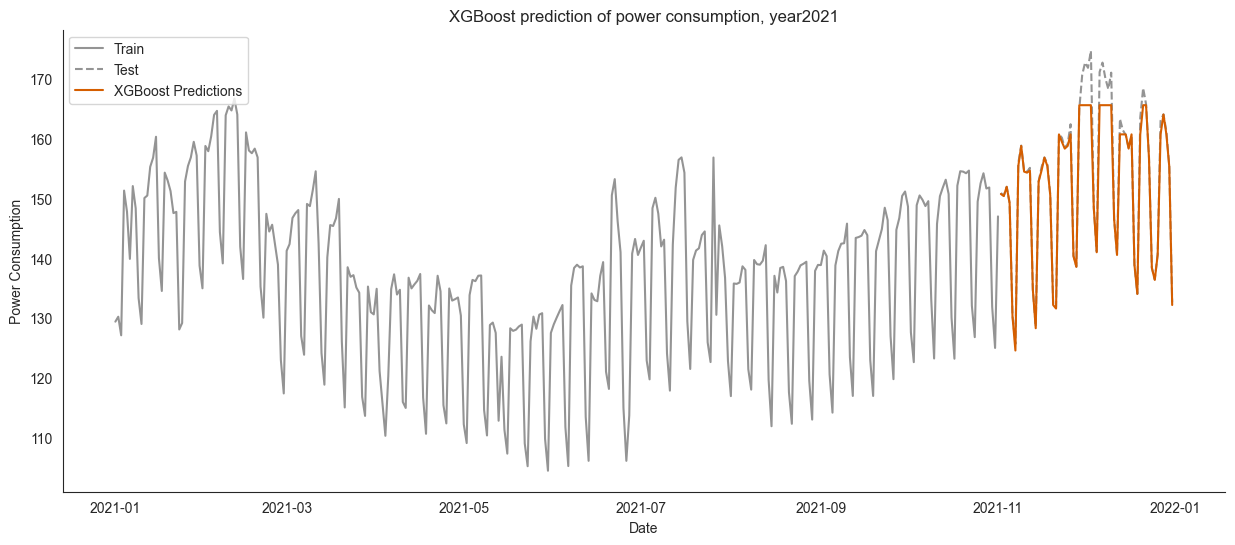

In [15]:
# Initialize Seaborn plot design
sns.set_style("white")

# Create new figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Convert your data into pandas series if they are not already
y_train_pd = pd.Series(y_train['Power_Consumption'].values, index=y_train['Power_Consumption'].index)
y_test_pd = pd.Series(y_test['Power_Consumption'].values, index=y_test['Power_Consumption'].index)
predictions_pd = pd.Series(predictions, index=y_test['Power_Consumption'].index)

# "Husl" palette
palette = sns.color_palette('colorblind')

# Plot the training data 
sns.lineplot(x=y_train_pd.index, y=y_train_pd, label='Train', ax=ax, color=palette[7])

# Plot the testing data 
sns.lineplot(x=y_test_pd.index, y=y_test_pd, label='Test', ax=ax, color=palette[7], linestyle="--")

# Plot the SARIMA predictions
sns.lineplot(x=predictions_pd.index, y=predictions_pd, label='XGBoost Predictions', ax=ax, color=palette[3])

# Turn off the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Setting plot title and labels
ax.set_title('XGBoost prediction of power consumption, year'+ year)
ax.set_xlabel('Date')
ax.set_ylabel('Power Consumption')

# Setting legend
ax.legend(loc='upper left')

# Save the figure
#plt.savefig('figures/XGBoost_predictions_'+ year +'.pdf')
# Display the plot
plt.show()

#XGBoost include price 

In [19]:

import xgboost as xgb
import numpy as np
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error


# y has no meaning. we can say that we have train and test. test is 60 points which starts from end of train set. This is set globally set in the top of the notbook.

print("TRAIN:", y_train[['Power_Consumption', 'Price']].shape, "；  TEST:", y_test['Power_Consumption'].shape)


start = time.perf_counter()

# Define hyperparameters grid for GridSearchCV
cv_params = {
    'n_estimators': [50, 500],
    'max_depth': [1, 15],
    'learning_rate': [0.1, 0.2, 0.3, 0.4]
}

# Instantiate XGBRegressor
xg = xgb.XGBRegressor()

# Perform GridSearchCV
optimized_GBM = GridSearchCV(estimator=xg, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=-1)
optimized_GBM.fit(y_train[['Power_Consumption', 'Price']], y_train['Power_Consumption'])

end = time.perf_counter()
runtime = end - start
print("Runtime = ", runtime)

# Print best parameters and best model score
print('Best params：{0}'.format(optimized_GBM.best_params_))
print('Best model score:{0}'.format(optimized_GBM.best_score_))

# Predictions
xg = xgb.XGBRegressor(**optimized_GBM.best_params_, n_jobs=-1)
xg.fit(y_train[['Power_Consumption', 'Price']], y_train['Power_Consumption'])
predictions = xg.predict(y_test[['Power_Consumption', 'Price']])

# Calculate MAE
mae = mean_absolute_error(y_test['Power_Consumption'], predictions)

# Calculate MSE
mse = mean_squared_error(y_test['Power_Consumption'], predictions)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test['Power_Consumption'], predictions)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")

TRAIN: (305, 2) ；  TEST: (60,)
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Runtime =  0.7783197080025275
Best params：{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 500}
Best model score:0.9865931922806126
MSE: 4.286676272619016
RMSE: 2.070429006901472
MAE: 1.087572837471807
MAPE: 0.6543805320284948


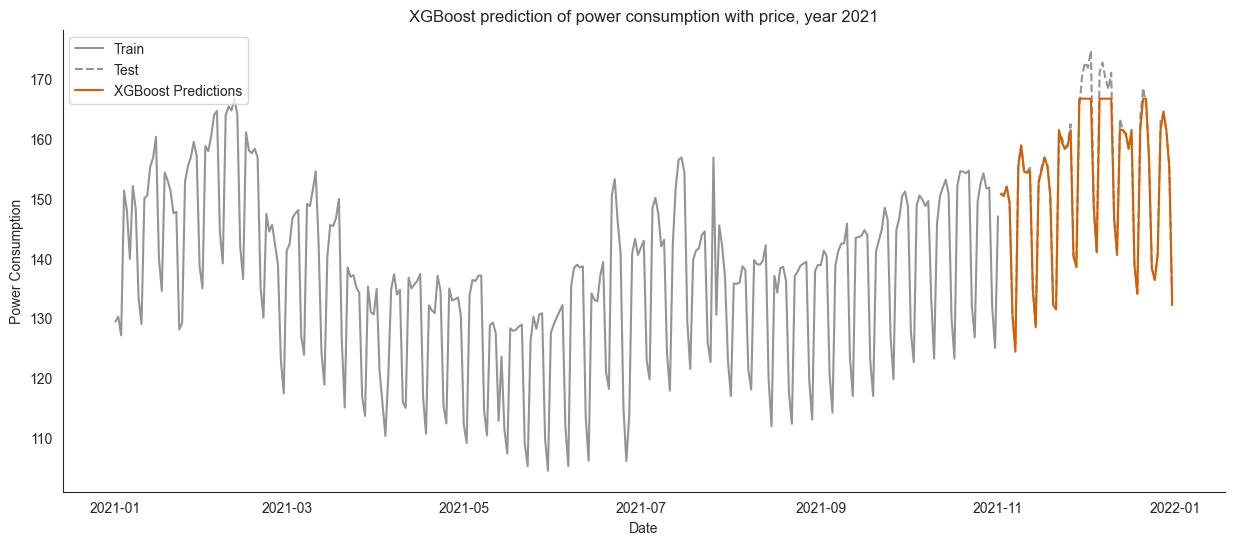

In [20]:

# Initialize Seaborn plot design
sns.set_style("white")

# Create new figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Convert your data into pandas series if they are not already
y_train_pd = pd.Series(y_train.values[:, 0], index=y_train.index)
y_test_pd = pd.Series(y_test.values[:, 0], index=y_test.index)
predictions_pd = pd.Series(predictions, index=y_test.index)


# "Husl" palette
palette = sns.color_palette('colorblind')

# Plot the training data 
sns.lineplot(x=y_train_pd.index, y=y_train_pd, label='Train', ax=ax, color=palette[7])

# Plot the testing data 
sns.lineplot(x=y_test_pd.index, y=y_test_pd, label='Test', ax=ax, color=palette[7], linestyle="--")

# Plot the SARIMA predictions
sns.lineplot(x=predictions_pd.index, y=predictions_pd, label='XGBoost Predictions', ax=ax, color=palette[3])

# Turn off the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Setting plot title and labels
ax.set_title('XGBoost prediction of power consumption with price, year ' + year)
ax.set_xlabel('Date')
ax.set_ylabel('Power Consumption')

# Setting legend
ax.legend(loc='upper left')

# Save the figure
#plt.savefig('figures/XGBoost_predictions_'+ year +'.pdf')
# Display the plot
plt.show()

#XGBoost include temperature

In [23]:
import xgboost as xgb
import numpy as np
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error


# y have no meaning. we can say that we have train and test. test is 60 points which starts from end of train set. This is set globally.

print("TRAIN:", y_train[['Power_Consumption', 'Dew Point Temperature_P39']].shape, "；  TEST:", y_test['Power_Consumption'].shape)


start = time.perf_counter()

# Define hyperparameters grid for GridSearchCV
cv_params = {
    'n_estimators': [50, 500],
    'max_depth': [1, 15],
    'learning_rate': [0.1, 0.2, 0.3, 0.4]
}

# Instantiate XGBRegressor
xg = xgb.XGBRegressor()

# Perform GridSearchCV
optimized_GBM = GridSearchCV(estimator=xg, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=-1)
optimized_GBM.fit(y_train[['Power_Consumption', 'Dew Point Temperature_P39']], y_train['Power_Consumption'])

end = time.perf_counter()
runtime = end - start
print("Runtime = ", runtime)

# Print best parameters and best model score
print('Best params：{0}'.format(optimized_GBM.best_params_))
print('Best model score:{0}'.format(optimized_GBM.best_score_))

# Predictions
xg = xgb.XGBRegressor(**optimized_GBM.best_params_, n_jobs=-1)
xg.fit(y_train[['Power_Consumption', 'Dew Point Temperature_P39']], y_train['Power_Consumption'])
predictions = xg.predict(y_test[['Power_Consumption', 'Dew Point Temperature_P39']])

# Calculate MAE
mae = mean_absolute_error(y_test['Power_Consumption'], predictions)

# Calculate MSE
mse = mean_squared_error(y_test['Power_Consumption'], predictions)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test['Power_Consumption'], predictions)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")

TRAIN: (305, 2) ；  TEST: (60,)
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Runtime =  0.8788283750000119
Best params：{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 500}
Best model score:0.9865587051110696
MSE: 7.741953694175845
RMSE: 2.782436646929422
MAE: 1.4144957255433355
MAPE: 0.8441003684565397


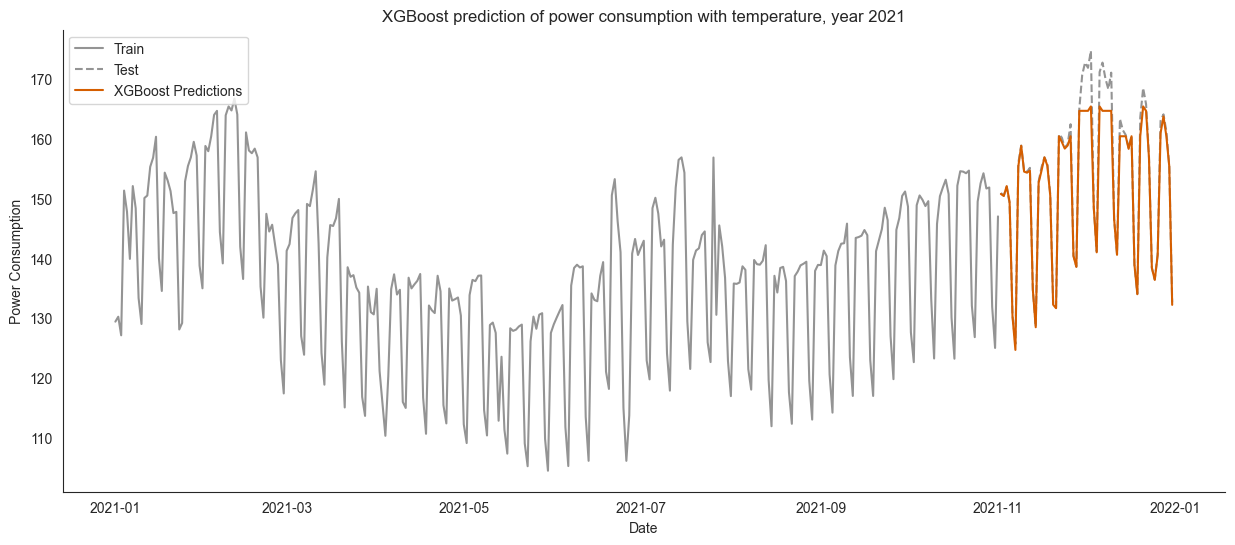

In [25]:
# Initialize Seaborn plot design
sns.set_style("white")

# Create new figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Convert your data into pandas series if they are not already
y_train_pd = pd.Series(y_train.values[:, 0], index=y_train.index)
y_test_pd = pd.Series(y_test.values[:, 0], index=y_test.index)
predictions_pd = pd.Series(predictions, index=y_test.index)


# "Husl" palette
palette = sns.color_palette('colorblind')

# Plot the training data 
sns.lineplot(x=y_train_pd.index, y=y_train_pd, label='Train', ax=ax, color=palette[7])

# Plot the testing data 
sns.lineplot(x=y_test_pd.index, y=y_test_pd, label='Test', ax=ax, color=palette[7], linestyle="--")

# Plot the SARIMA predictions
sns.lineplot(x=predictions_pd.index, y=predictions_pd, label='XGBoost Predictions', ax=ax, color=palette[3])

# Turn off the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Setting plot title and labels
ax.set_title('XGBoost prediction of power consumption with temperature, year ' + year)
ax.set_xlabel('Date')
ax.set_ylabel('Power Consumption')

# Setting legend
ax.legend(loc='upper left')

# Save the figure
#plt.savefig('figures/XGBoost_predictions_'+ year +'.pdf')
# Display the plot
plt.show()

#XGBoost include price and temperature 

In [26]:
import xgboost as xgb
import numpy as np
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error


# y have no meaning. we can say that we have train and test. test is 60 points which starts from end of train set. This is set globally.

print("TRAIN:", y_train[['Power_Consumption', 'Price', 'Dew Point Temperature_P39']].shape, "；  TEST:", y_test['Power_Consumption'].shape)


start = time.perf_counter()

# Define hyperparameters grid for GridSearchCV
cv_params = {
    'n_estimators': [50, 500],
    'max_depth': [1, 15],
    'learning_rate': [0.1, 0.2, 0.3, 0.4]
}

# Instantiate XGBRegressor
xg = xgb.XGBRegressor()

# Perform GridSearchCV
optimized_GBM = GridSearchCV(estimator=xg, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=-1)
optimized_GBM.fit(y_train[['Power_Consumption', 'Price', 'Dew Point Temperature_P39']], y_train['Power_Consumption'])

end = time.perf_counter()
runtime = end - start
print("Runtime = ", runtime)

# Print best parameters and best model score
print('Best params：{0}'.format(optimized_GBM.best_params_))
print('Best model score:{0}'.format(optimized_GBM.best_score_))

# Predictions
xg = xgb.XGBRegressor(**optimized_GBM.best_params_, n_jobs=-1)
xg.fit(y_train[['Power_Consumption', 'Price', 'Dew Point Temperature_P39']], y_train['Power_Consumption'])
predictions = xg.predict(y_test[['Power_Consumption', 'Price', 'Dew Point Temperature_P39']])

# Calculate MAE
mae = mean_absolute_error(y_test['Power_Consumption'], predictions)

# Calculate MSE
mse = mean_squared_error(y_test['Power_Consumption'], predictions)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test['Power_Consumption'], predictions)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")

TRAIN: (305, 3) ；  TEST: (60,)
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Runtime =  0.8022256670010393
Best params：{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 500}
Best model score:0.9865802604349042
MSE: 5.023591926231246
RMSE: 2.2413370844724017
MAE: 1.1523990957074848
MAPE: 0.6914761290415861


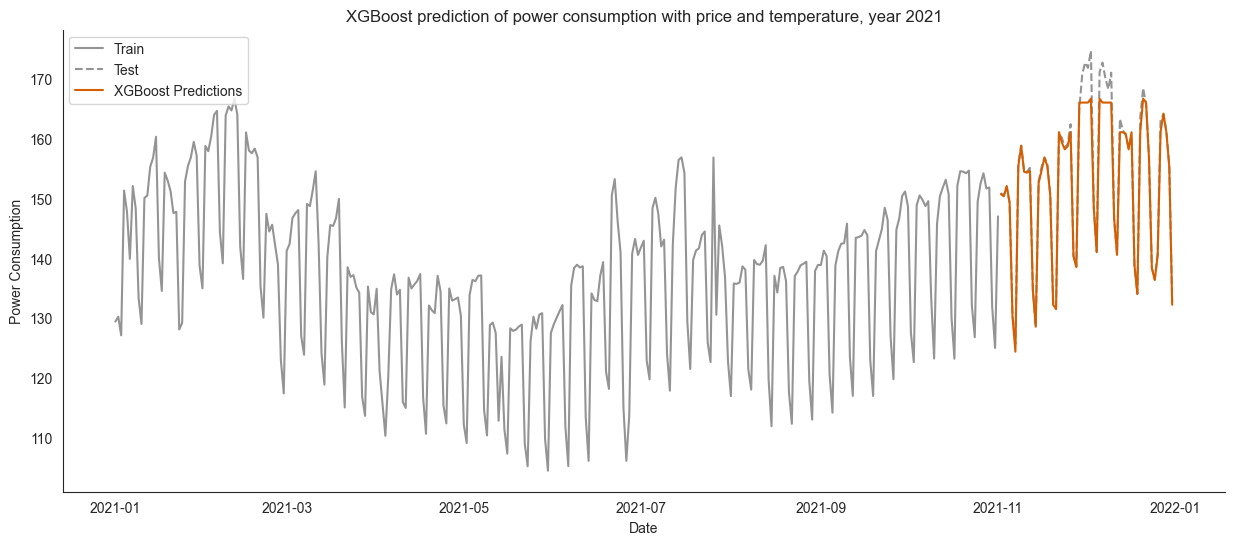

In [27]:
# Initialize Seaborn plot design
sns.set_style("white")

# Create new figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Convert your data into pandas series if they are not already
y_train_pd = pd.Series(y_train.values[:, 0], index=y_train.index)
y_test_pd = pd.Series(y_test.values[:, 0], index=y_test.index)
predictions_pd = pd.Series(predictions, index=y_test.index)


# "Husl" palette
palette = sns.color_palette('colorblind')

# Plot the training data 
sns.lineplot(x=y_train_pd.index, y=y_train_pd, label='Train', ax=ax, color=palette[7])

# Plot the testing data 
sns.lineplot(x=y_test_pd.index, y=y_test_pd, label='Test', ax=ax, color=palette[7], linestyle="--")

# Plot the SARIMA predictions
sns.lineplot(x=predictions_pd.index, y=predictions_pd, label='XGBoost Predictions', ax=ax, color=palette[3])

# Turn off the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Setting plot title and labels
ax.set_title('XGBoost prediction of power consumption with price and temperature, year ' + year)
ax.set_xlabel('Date')
ax.set_ylabel('Power Consumption')

# Setting legend
ax.legend(loc='upper left')

# Save the figure
#plt.savefig('figures/XGBoost_predictions_'+ year +'.pdf')
# Display the plot
plt.show()

#XGBoost include price and temp (without power as train data)

In [28]:
import xgboost as xgb
import numpy as np
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error


# y have no meaning. we can say that we have train and test. test is 60 points which starts from end of train set. This is set globally.

print("TRAIN:", y_train[['Price', 'Dew Point Temperature_P39']].shape, "；  TEST:", y_test['Power_Consumption'].shape)


start = time.perf_counter()

# Define hyperparameters grid for GridSearchCV
cv_params = {
    'n_estimators': [50, 500],
    'max_depth': [1, 15],
    'learning_rate': [0.1, 0.2, 0.3, 0.4]
}

# Instantiate XGBRegressor
xg = xgb.XGBRegressor()

# Perform GridSearchCV
optimized_GBM = GridSearchCV(estimator=xg, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=-1)
optimized_GBM.fit(y_train[['Price', 'Dew Point Temperature_P39']], y_train['Power_Consumption'])

end = time.perf_counter()
runtime = end - start
print("Runtime = ", runtime)

# Print best parameters and best model score
print('Best params：{0}'.format(optimized_GBM.best_params_))
print('Best model score:{0}'.format(optimized_GBM.best_score_))

# Predictions
xg = xgb.XGBRegressor(**optimized_GBM.best_params_, n_jobs=-1)
xg.fit(y_train[['Price', 'Dew Point Temperature_P39']], y_train['Power_Consumption'])
predictions = xg.predict(y_test[['Price', 'Dew Point Temperature_P39']])

# Calculate MAE
mae = mean_absolute_error(y_test['Power_Consumption'], predictions)

# Calculate MSE
mse = mean_squared_error(y_test['Power_Consumption'], predictions)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test['Power_Consumption'], predictions)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")

TRAIN: (305, 2) ；  TEST: (60,)
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Runtime =  0.6256342500018945
Best params：{'learning_rate': 0.3, 'max_depth': 1, 'n_estimators': 50}
Best model score:-0.5671463882157025
MSE: 221.48145123870395
RMSE: 14.882252895267705
MAE: 13.306665417231649
MAPE: 8.62853598646042


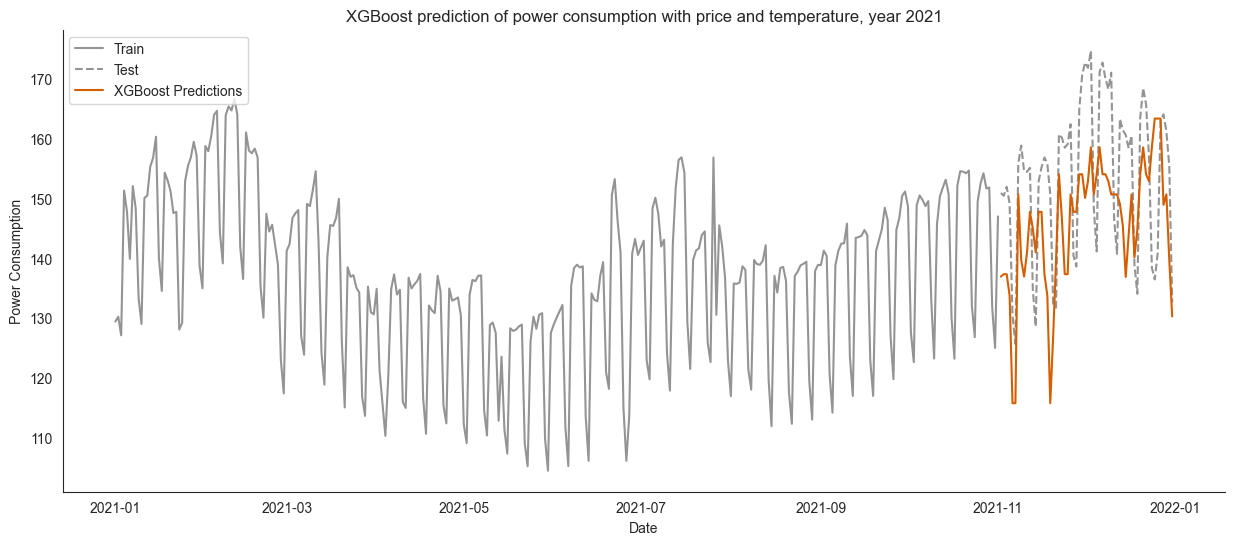

In [29]:
# Initialize Seaborn plot design
sns.set_style("white")

# Create new figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Convert your data into pandas series if they are not already
y_train_pd = pd.Series(y_train.values[:, 0], index=y_train.index)
y_test_pd = pd.Series(y_test.values[:, 0], index=y_test.index)
predictions_pd = pd.Series(predictions, index=y_test.index)


# "Husl" palette
palette = sns.color_palette('colorblind')

# Plot the training data 
sns.lineplot(x=y_train_pd.index, y=y_train_pd, label='Train', ax=ax, color=palette[7])

# Plot the testing data 
sns.lineplot(x=y_test_pd.index, y=y_test_pd, label='Test', ax=ax, color=palette[7], linestyle="--")

# Plot the SARIMA predictions
sns.lineplot(x=predictions_pd.index, y=predictions_pd, label='XGBoost Predictions', ax=ax, color=palette[3])

# Turn off the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Setting plot title and labels
ax.set_title('XGBoost prediction of power consumption with price and temperature, year ' + year)
ax.set_xlabel('Date')
ax.set_ylabel('Power Consumption')

# Setting legend
ax.legend(loc='upper left')

# Save the figure
#plt.savefig('figures/XGBoost_predictions_'+ year +'.pdf')
# Display the plot
plt.show()

XGBoost code with random train and test split (old)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
import time
from sklearn import metrics
from sklearn.metrics import r2_score

# Splitting the data into features (X) and target variable (y)
X = commercial_df_2021_resampled[['Price', 'Dew Point Temperature_P39']]
y = commercial_df_2021_resampled['Power_Consumption']

# Splitting the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1644, random_state=42)   #test size is the forecasting horizon. My data is daily aggregated, so I have 365 days and if i set test_size to 16.44%, the 16.44% (or 0.1644) percentage of 365 means 60 days (2 months)
print("TRAIN:", xtrain.shape, "；  TEST:", xtest.shape)
print("TRAIN:", ytrain.shape, "；  TEST:", ytest.shape)

start = time.perf_counter()

# Define hyperparameters grid for GridSearchCV
cv_params = {
    'n_estimators': [50, 500],
    'max_depth': [1, 15],
    'learning_rate': [0.1, 0.2, 0.3, 0.4]
}

# Instantiate XGBRegressor
xg = xgb.XGBRegressor()

# Perform GridSearchCV
optimized_GBM = GridSearchCV(estimator=xg, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=-1)
optimized_GBM.fit(xtrain, ytrain)

end = time.perf_counter()
runtime = end - start
print("Runtime = ", runtime)

# Print best parameters and best model score
print('Best params：{0}'.format(optimized_GBM.best_params_))
print('Best model score:{0}'.format(optimized_GBM.best_score_))


TRAIN: (304, 2) ；  TEST: (61, 2)
TRAIN: (304,) ；  TEST: (61,)
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Runtime =  1.6518419999993057
Best params：{'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 50}
Best model score:0.3049655354865181


In [ ]:
xtrain.shape[0]

304

In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100


xg = xgb.XGBRegressor(learning_rate=0.1, max_delta_step=0, max_depth=1,
                      min_child_weight=3,n_estimators=500, n_jobs=-1)
xg.fit(xtrain, ytrain)
xg_pre = xg.predict(xtest)
blk_ytest_np2 = np.array(ytest)

xg_lm = mean_squared_error(blk_ytest_np2, xg_pre)
print("xg_MSE:", xg_lm)
xg_lrm = np.sqrt(xg_lm)
print("xg_RMSE:", xg_lrm)
xg_mae = metrics.mean_absolute_error(blk_ytest_np2, xg_pre)
print("xg_MAE:", xg_mae)
xg_mape = mape(blk_ytest_np2, xg_pre)
print("xg_MAPE:", xg_mape)
xg_r2 = r2_score(blk_ytest_np2, xg_pre)
print("xg_score2:",xg_r2)

xg_MSE: 159.8381041058011
xg_RMSE: 12.642709523903534
xg_MAE: 10.122252482766879
xg_MAPE: 7.375220532731341
xg_score2: 0.24598200766340816
